In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
from scipy import signal

%matplotlib inline

In [2]:
# Changing working directory
os.chdir(r'G:\Masters\Thesis\Data\data')

# Get all files in the directory
current_path = os.getcwd()
file_names = os.listdir(current_path)

# Get .csv files
csv_files = []
for file in file_names:

    if '.csv' in file:
        csv_files.append(file)

Working with a csv file

In [3]:
# Reading files
dfs =[]
for file in csv_files:

    df = pd.read_csv(file)
    dfs.append(df)

# Combine all dataframes
test_df = pd.concat(dfs, axis=0, ignore_index=True)

print(f'There are total number of {test_df.shape[0]} rows')
test_df.head(10)

There are total number of 24 rows


,Unnamed: 0,date,time,kks,data,unit,duration,dt
0,0,07/19/2023,14:30:00,32_COMP_RAW_PRO_XREL,"[-8.713050842285156, -8.711616516113281, -8.71...",um,1,0.00004
1,1,07/21/2023,14:30:00,32_COMP_RAW_PRO_XREL,"[-8.726463317871094, -8.725486755371094, -8.72...",um,1,0.00004
2,2,07/22/2023,14:30:02,32_COMP_RAW_PRO_XREL,"[-8.762596130371094, -8.765960693359375, -8.76...",um,1,0.00004
3,0,07/19/2023,14:30:00,32_COMP_RAW_PRO_YREL,"[-8.357803344726562, -8.355949401855469, -8.35...",um,1,0.00004
4,1,07/21/2023,14:30:00,32_COMP_RAW_PRO_YREL,"[-8.337944030761719, -8.336860656738281, -8.33...",um,1,0.00004
5,2,07/22/2023,14:30:02,32_COMP_RAW_PRO_YREL,"[-8.330734252929688, -8.329658508300781, -8.32...",um,1,0.00004
6,0,08/22/2023,14:30:01,32_COMP_RAW_PRO_YREL,"[-8.446327209472656, -8.445404052734375, -8.44...",um,1,0.00004
7,0,08/22/2023,14:30:01,32_COMP_RAW_PRO_XREL,"[-8.672065734863281, -8.6728515625, -8.6717376...",um,1,0.00004
8,0,09/30/2023,14:30:00,32_COMP_RAW_PRO_XREL,"[-8.679725646972656, -8.679000854492188, -8.68...",um,1,0.00004
9,1,10/01/2023,14:30:00,32_COMP_RAW_PRO_XREL,"[-8.637619018554688, -8.636550903320312, -8.63...",um,1,0.00004


The Duration of data sample is 1 seconds

sample rate is 25000 Hz

NOTE: There is no horizontal data

---

More into data

In [4]:
name_in_kks = test_df.kks.unique()
print(f'Data types in the current dataset :\n{name_in_kks}')

Data types in the current dataset :
['32_COMP_RAW_PRO_XREL' '32_COMP_RAW_PRO_YREL' '32_TURB_RAW_PRO_XREL'
 '32_TURB_RAW_PRO_YREL']


In [5]:
# print(f'For the file {test_file}:')

# Shape of data
print(f'The shape of the dateframe is {test_df.shape}')

# Extracting data feature
test_data = test_df.data[0]
print(f"Type of the data in DataFrame is {type(test_data)}")
test_data = np.array(eval(test_data))
print(f'data shape is {test_data.shape}', end='\n\n')


The shape of the dateframe is (24, 8)
Type of the data in DataFrame is <class 'str'>
data shape is (25000,)



In [6]:
# Extracting all data
all_data = np.zeros((test_df.shape[0],25000))

for i, data in enumerate(test_df.data):

    data = eval(data)
    data = np.array(data).reshape(-1,)
    data = signal.detrend(data) # Detrending the signal
    all_data[i,:] = data

Plot signals

Trend of signals is eliminated

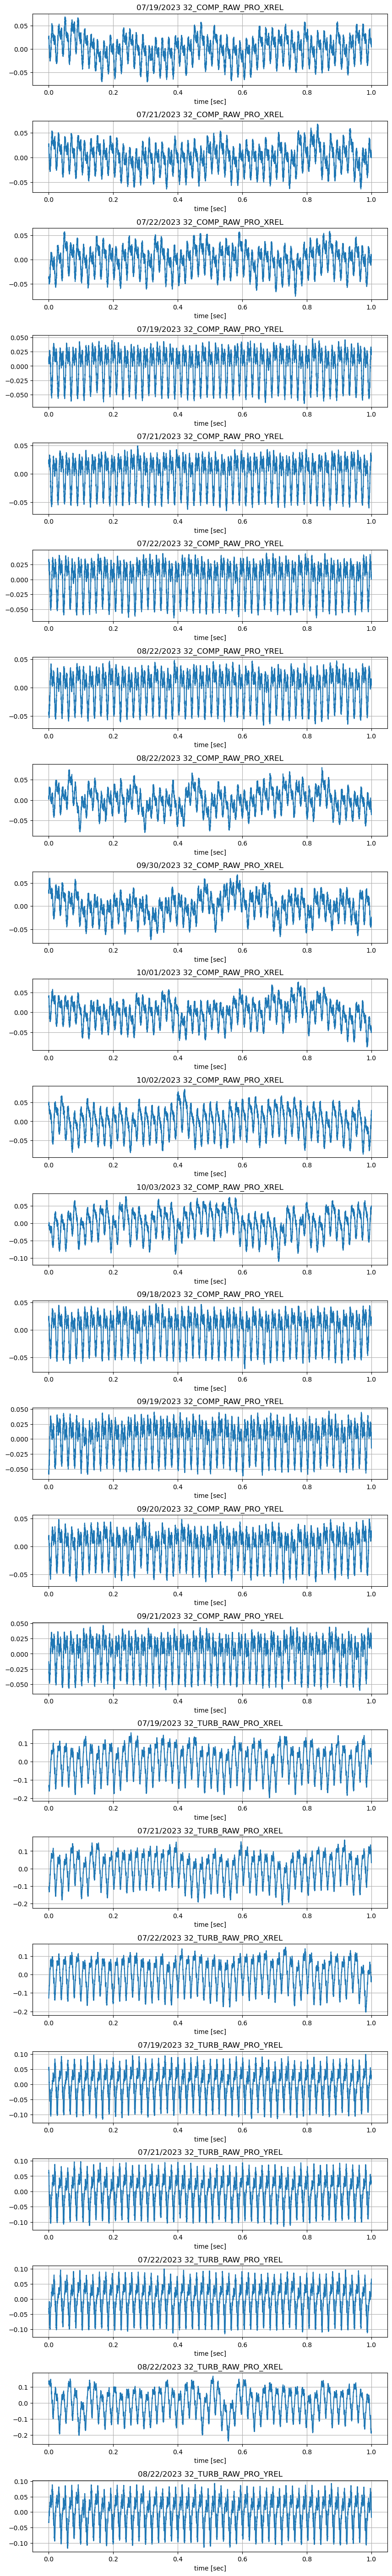

In [8]:
hight = test_df.shape[0]
H = hight * 3
plt.figure(figsize=(10,H))
x_axis = np.linspace(0,1,25000)

# Plotting signals
for i in range(hight):

    plt.subplot(hight, 1, i+1)
    plt.plot(x_axis, all_data[i,:])
    plt.xlabel('time [sec]')
    plt.title(test_df['date'][i]+ ' ' + test_df['kks'][i])
    plt.grid()
plt.subplots_adjust(hspace=0.5)

FFT

In [9]:
def plot_freq (signal):
    lim = 500
    fft_test = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_test)) * 25000
    plt.plot(np.abs(freqs)[:lim], np.abs(fft_test)[:lim])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid(True)


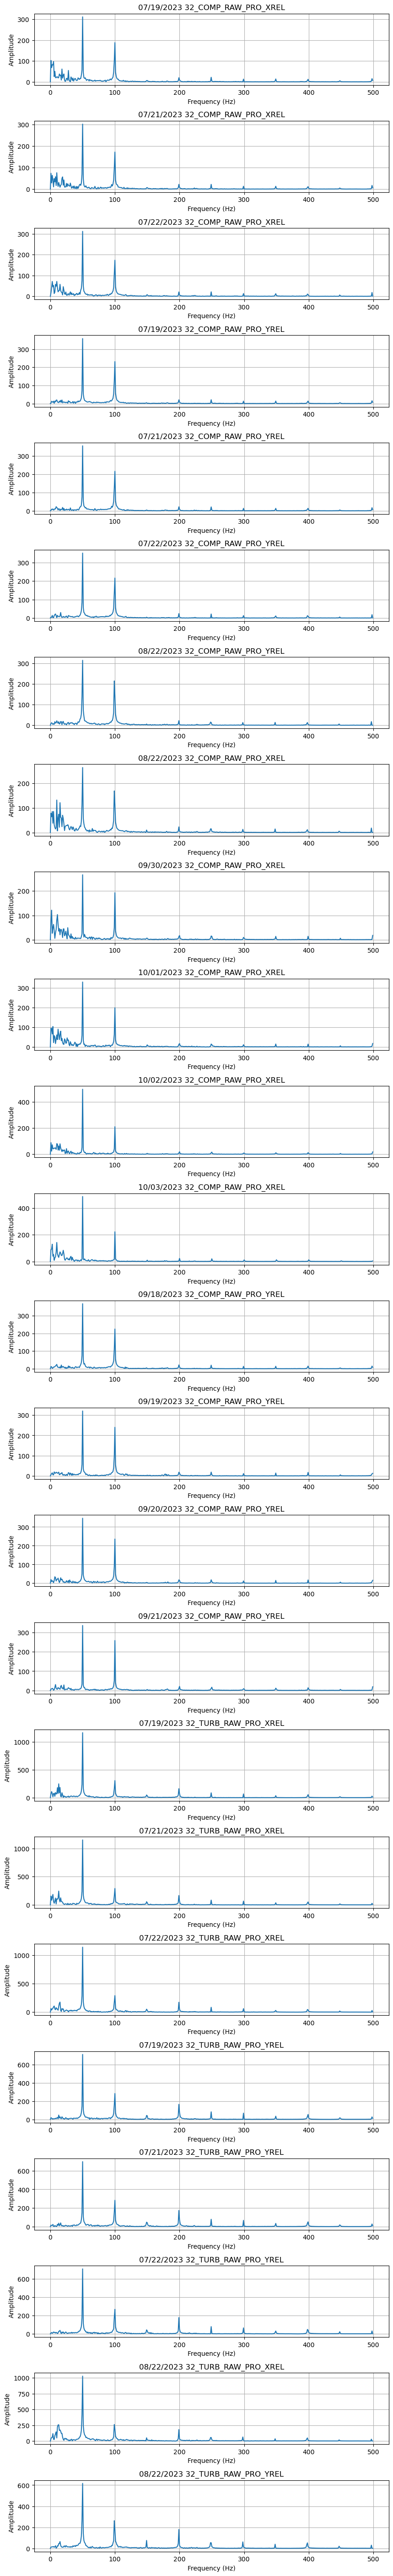

In [10]:
hight = test_df.shape[0]
H = hight * 3
plt.figure(figsize=(10,H))

# Plotting signals
for i in range(hight):

    plt.subplot(hight, 1, i+1)
    plot_freq(all_data[i,:])
    plt.title(test_df['date'][i]+ ' ' +test_df['kks'][i])
plt.subplots_adjust(hspace=0.5)

## EMD 
  

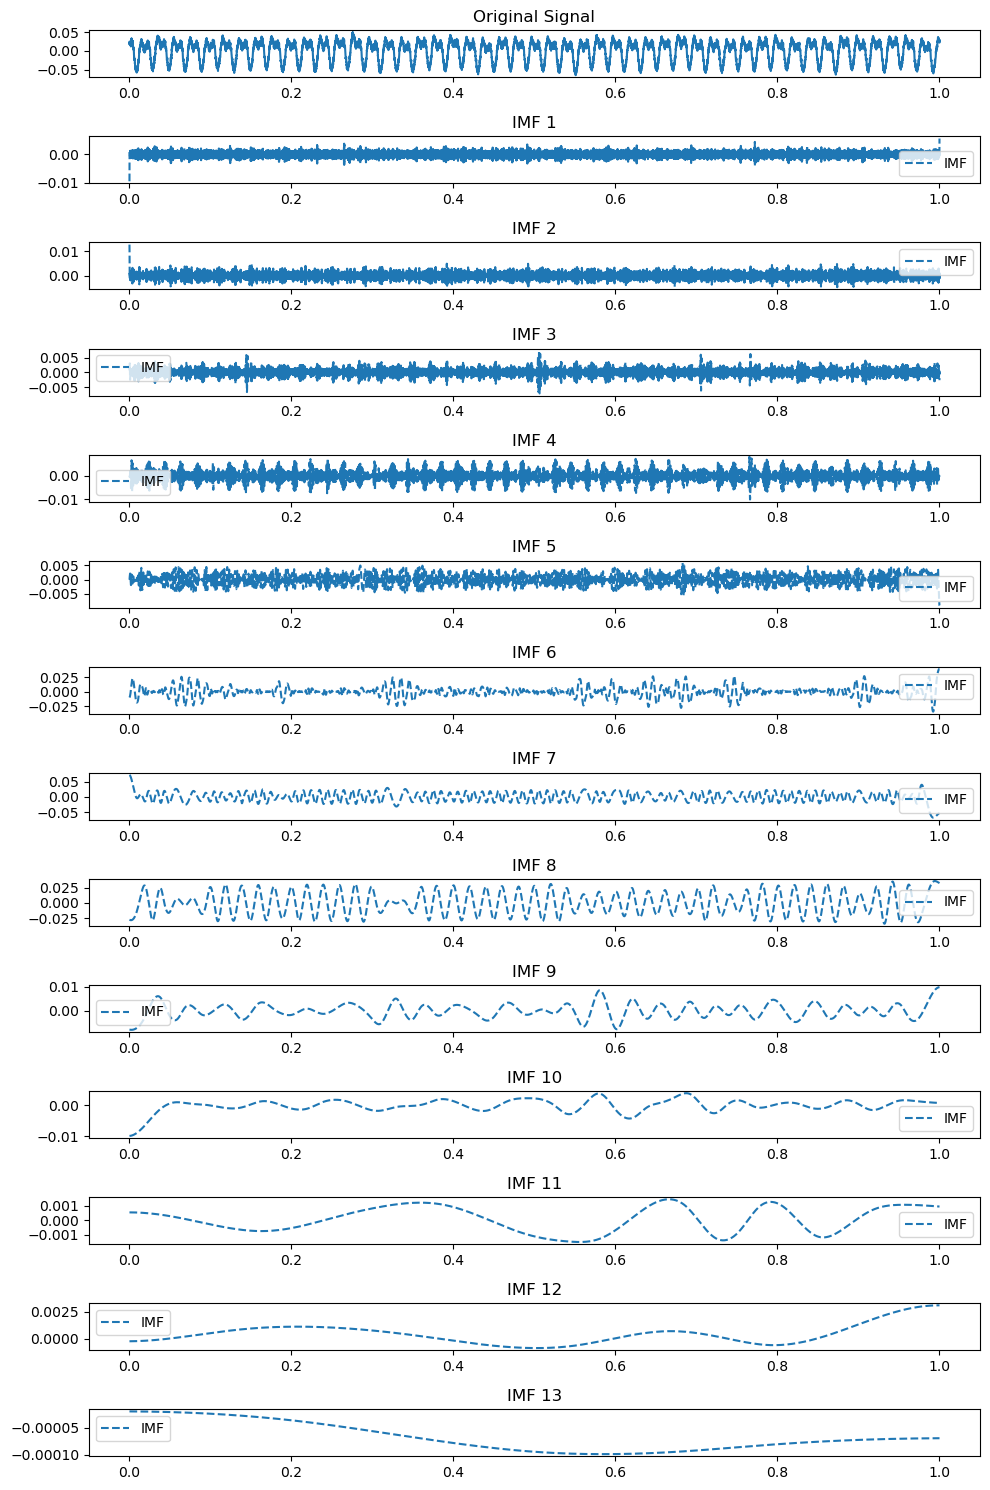

In [10]:
from pyhht.visualization import plot_imfs
from pyhht.emd import EMD
from scipy.signal import hilbert

signal = all_data[4,:]

# Perform empirical mode decomposition (EMD)
decomposer = EMD(signal)
imfs = decomposer.decompose()

# Apply Hilbert transform to each IMF
hilbert_imfs = []
for imf in imfs:
    hilbert_imfs.append(hilbert(imf))

# Plot the original signal, IMFs, and Hilbert transformed IMFs
plt.figure(figsize=(10, 15))
plt.subplot(len(hilbert_imfs) + 1, 1, 1)
plt.plot(x_axis, signal)
plt.title('Original Signal')

for i, hilbert_imf in enumerate(hilbert_imfs):
    plt.subplot(len(hilbert_imfs) + 1, 1, i + 2)
    # plt.plot(x_axis, hilbert_imf.real, label='Hilbert Transformed')
    plt.plot(x_axis, imfs[i], '--', label='IMF')
    plt.legend()
    plt.title(f'IMF {i + 1}')

plt.tight_layout()
plt.show()

## Orbit

Selecting data for a specific day

In [48]:
dates = test_df['date'].unique()
date_df = test_df[test_df.date==dates[2]]
date_df.head()

,Unnamed: 0,date,time,kks,data,unit,duration,dt
2,2,07/22/2023,14:30:02,32_COMP_RAW_PRO_XREL,"[-8.762596130371094, -8.765960693359375, -8.76...",um,1,0.00004
5,2,07/22/2023,14:30:02,32_COMP_RAW_PRO_YREL,"[-8.330734252929688, -8.329658508300781, -8.32...",um,1,0.00004
18,2,07/22/2023,14:30:02,32_TURB_RAW_PRO_XREL,"[-8.635719299316406, -8.633552551269531, -8.63...",um,1,0.00004
21,2,07/22/2023,14:30:02,32_TURB_RAW_PRO_YREL,"[-8.340065002441406, -8.343544006347656, -8.34...",um,1,0.00004
